Métodos com mais registros duplicados:
RK45      104
DOP853     90
LSODA      71
Name: method, dtype: int64


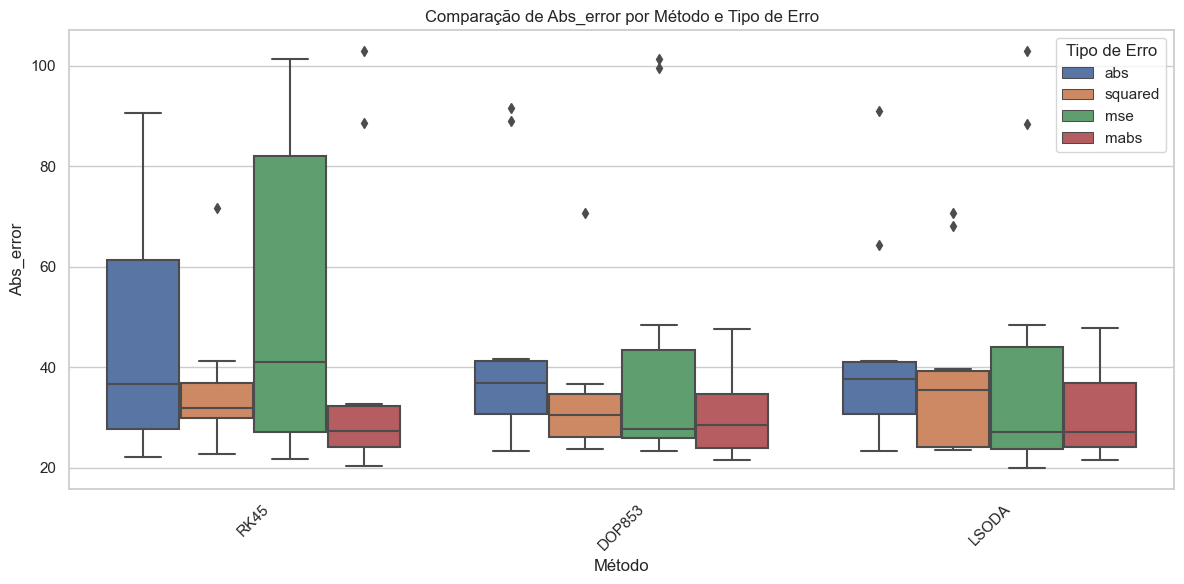

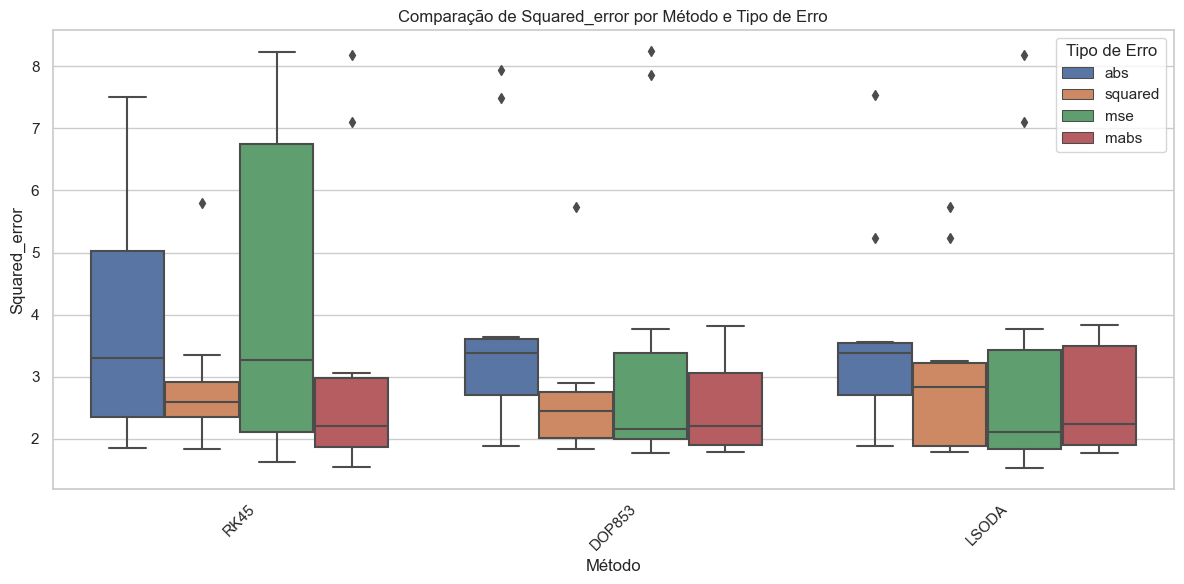

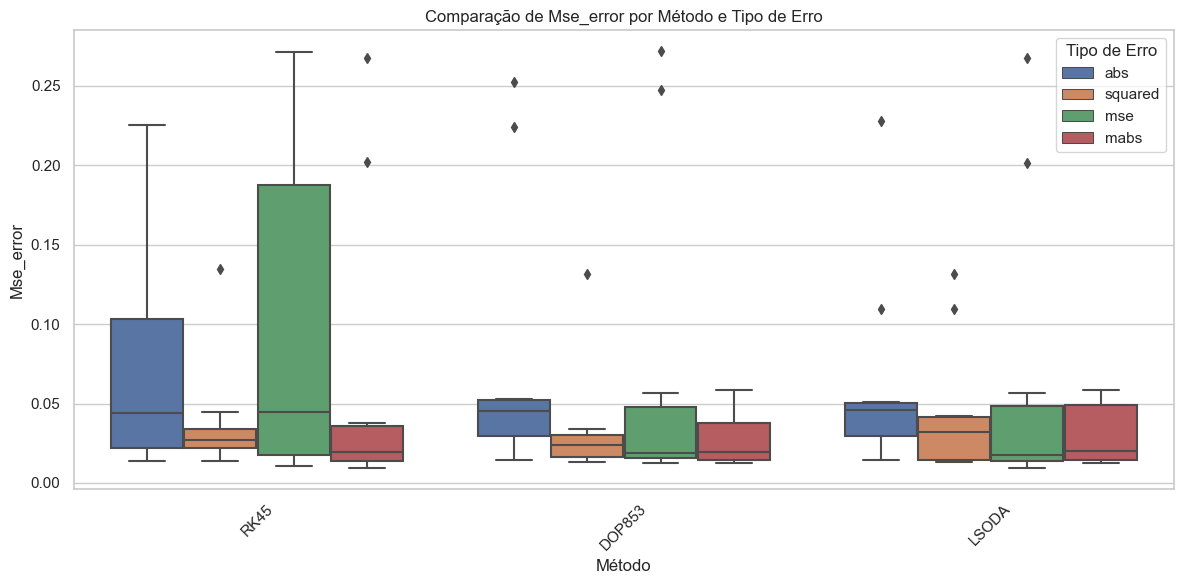

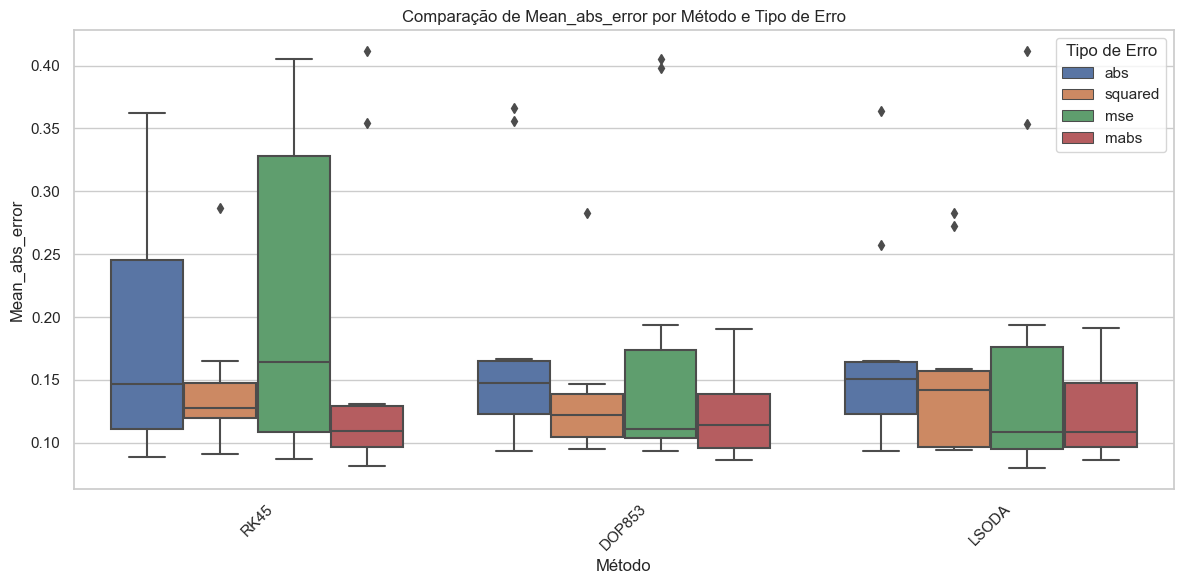

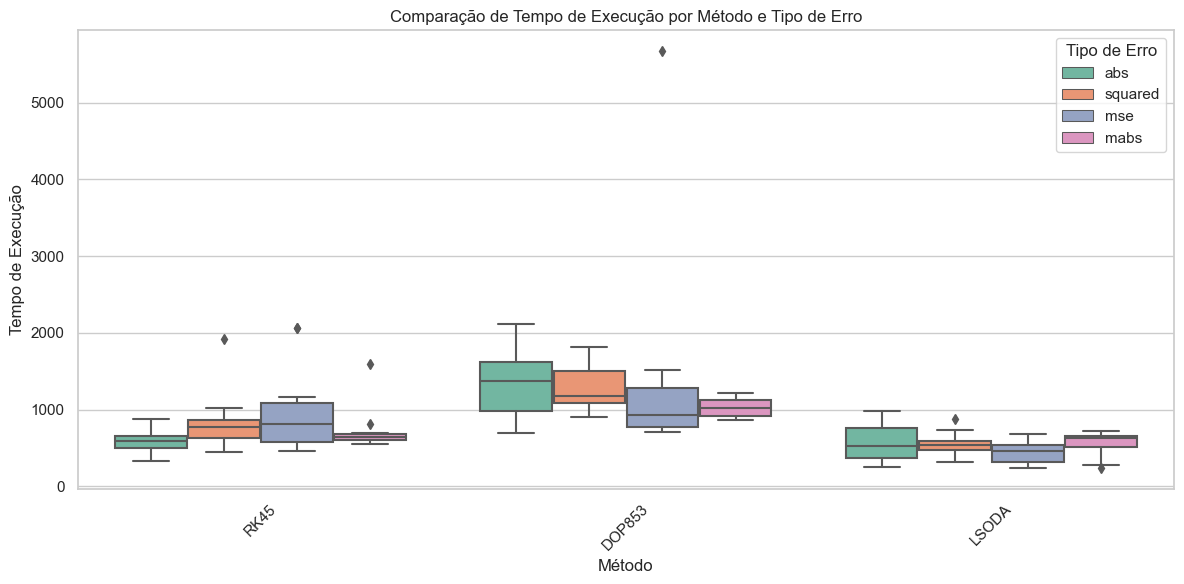

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
file_path = 'GRN5_results.csv'
data = pd.read_csv(file_path)

# Validar se as colunas esperadas estão presentes
expected_columns = [
    'best_ind', 'error_type', 'method', 'seed', 'abs_error', 
    'squared_error', 'MSE_error', 'mean_abs_error', 'execution_time'
]

if not set(expected_columns).issubset(data.columns):
    raise ValueError(f"O arquivo CSV deve conter as colunas: {expected_columns}")

# # Contar duplicatas antes de removê-las
# duplicates = data[data.duplicated(keep=False)]  # Obtém todas as duplicatas
# duplicate_counts = duplicates['method'].value_counts()  # Conta por método

# # Exibir quais métodos têm mais registros duplicados
# if not duplicate_counts.empty:
#     print("Métodos com mais registros duplicados:")
#     print(duplicate_counts)
# else:
#     print("Nenhum dado duplicado encontrado.")

# # Remover dados duplicados (considerando todos os valores iguais)
# data = data.drop_duplicates()

# Criar gráficos comparativos para boxplots
sns.set_theme(style="whitegrid")
metrics = ['abs_error', 'squared_error', 'MSE_error', 'mean_abs_error']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=data, 
        x='method', 
        y=metric, 
        hue='error_type',
        showfliers=True  # Exibir outliers
    )
    plt.title(f'Comparação de {metric.capitalize()} por Método e Tipo de Erro')
    plt.xlabel('Método')
    plt.ylabel(f'{metric.capitalize()}')
    plt.legend(title='Tipo de Erro')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
# Criar gráficos comparativos para boxplots de tempo de execução com cores diferentes
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data, 
    x='method', 
    y='execution_time', 
    hue='error_type',
    showfliers=True,  # Exibir outliers
    palette="Set2"  # Usar paleta de cores diferente
)
plt.title(f'Comparação de Tempo de Execução por Método e Tipo de Erro')
plt.xlabel('Método')
plt.ylabel('Tempo de Execução')
plt.legend(title='Tipo de Erro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Agrupar por método e tipo de erro e calcular estatísticas
results = data.groupby(['method', 'error_type']).agg({
    'abs_error': ['mean', 'std', 'max', 'min'],
    'squared_error': ['mean', 'std', 'max', 'min'],
    'MSE_error': ['mean', 'std', 'max', 'min'],
    'mean_abs_error': ['mean', 'std', 'max', 'min'],
    'execution_time': 'mean'
}).reset_index()

# Renomear as colunas para facilitar
results.columns = ['method', 'error_type'] + [
    f"{metric}_{stat}" for metric in ['abs_error', 'squared_error', 'MSE_error', 'mean_abs_error']
    for stat in ['mean', 'std', 'max', 'min']
] + ['execution_time_mean']

# Salvar os resultados em um arquivo CSV (opcional)
results.to_csv('GRN5_statistics.csv', index=False)

metrics = ['abs_error', 'squared_error', 'MSE_error', 'mean_abs_error']
statistics = ['mean', 'std', 'min'] 

for metric in metrics:
    for stat in statistics:
        print(results['method'].iloc[0])
        print(results[f"{metric}_{stat}"])


DOP853
0     45.113401
1     30.250037
2     43.255256
3     34.042987
4     42.757929
5     30.454222
6     41.638060
7     38.337851
8     44.519135
9     40.063039
10    52.681094
11    35.583936
Name: abs_error_mean, dtype: float64
DOP853
0     24.487126
1      8.365059
2     30.972892
3     13.670787
4     20.266719
5      8.674703
6     29.712244
7     17.606754
8     23.261283
9     29.762034
10    32.771506
11    13.893003
Name: abs_error_std, dtype: float64
DOP853
0     23.326967
1     21.568383
2     23.425654
3     23.767843
4     23.395570
5     21.612469
6     19.952487
7     23.529858
8     22.232095
9     20.425509
10    21.754543
11    22.677180
Name: abs_error_min, dtype: float64
DOP853
0     3.928135
1     2.543041
2     3.405098
3     2.694622
4     3.652121
5     2.610788
6     3.272069
7     3.045156
8     3.816771
9     3.264847
10    4.246383
11    2.850401
Name: squared_error_mean, dtype: float64
DOP853
0     2.075840
1     0.802089
2     2.514130
3     1.132334

In [15]:
results[['method', 'abs_error_mean', 'error_type']]

,method,abs_error_mean,error_type
0,DOP853,45.113401,abs
1,DOP853,30.250037,mabs
2,DOP853,43.255256,mse
3,DOP853,34.042987,squared
4,LSODA,42.757929,abs
5,LSODA,30.454222,mabs
6,LSODA,41.638060,mse
7,LSODA,38.337851,squared
8,RK45,44.519135,abs
9,RK45,40.063039,mabs
